<div style="background-color: #c1f2a5">


# PS5

In this problem set, we are going to implement an analysis along the lines of Shepard’s Universal Law of Generalization. 
# Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Q1 Consequential Regions [5pts, HELP]

Imagine that you have some one-dimensional stimuli and a consequential region to which you generalize some property. Since the actual consequential region is unknown, we need to approximate it using a number of possible regions. To do so, you should first construct 10,000 consequential regions by randomly (i.e., uniformly) selecting a start and an end points in the range of **[-10,10]**. Please use **real numbers**, **NOT integers**. It will be the easiest if you store these consequential regions in a list [ (start1, end1), (start2, end2), ... ]. As shown in class, we will later assume that all of your consequential regions are equally likely.

Visualize the first 100 consequential regions in your list by plotting them as 100 successive **vertical lines**. The $x$-axis is the index of each consequential region and the $y$-axis shows the given consequential region at index $i$, ranging from starti to endi. Be sure to:

**1) Set the $y$-axis limit to be [-10, 10];**

**2) Set the xticks to be 0:1:100 (so you don't get wildly different plots depending on what increment is used);**

**3) Label your figure as always, including axes and the title.**

Upload your figure as `PS5_Q1.png` in Gradescope.

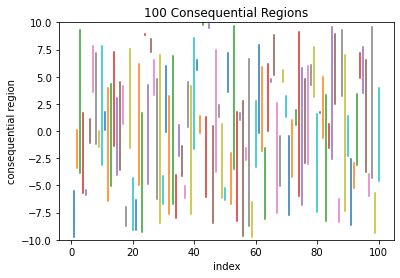

In [3]:
n=10000
CR_list = []

#YOUR CODE HERE
for _ in range(n):
    first = np.random.uniform(-10, 10)
    second = np.random.uniform(-10, 10)
    if first > second:
        CR_list.append((second, first))
    else:
        CR_list.append((first, second))

    
figure, axis = plt.subplots()
for i in range(1, 100 + 1):
    axis.plot([i, i], CR_list[i - 1])
axis.set_ylim([-10, 10])
axis.set_title("100 Consequential Regions")
axis.set_xlabel("index")
axis.set_ylabel("consequential region")


figure.savefig('PS5_Q1.png')

## Q2 Helper Function [5 pts, SOLO]
Write a function called `contains` that takes a region and a point and checks if the region contains the given point. You may find it helpful to use this function throughout the rest of this assignment.

For each point in [-10, 10] in an increment of 0.1, plot the proportion of regions that contain that point (consequential regions are inclusive).
Upload your figure in Gradescope as `PS5_Q2.png`.

**Hint:** The function should return `True` if the point is contained in the region and `False` if not.

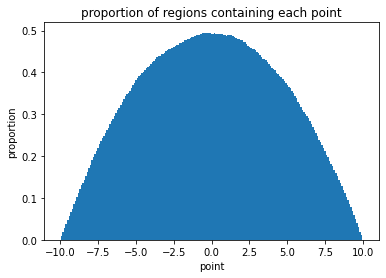

In [4]:
def contains(region, point):
    """ Takes a region (a 2-tuple) and a point (a float) and 
    Returns:
      - 'True' if the point is contained in the region (boundaries defined by the 2-tuple)
      - 'False' if the point is outside of the region """
    #YOUR CODE HERE
    if point >= region[0] and point <= region[1]:
        return True
    return False

#YOUR CODE HERE
points = [x * 0.1 for x in range(-100, 101)]
proportions = []
for point in points:
    i = 0
    for region in CR_list:
        if contains(region, point):
            i += 1
    proportions.append(i / len(CR_list))

# print(proportions)

figure, axis = plt.subplots()
axis.bar(points, proportions, width = 0.1)
axis.set_title("proportion of regions containing each point")
axis.set_xlabel("point")
axis.set_ylabel("proportion")

figure.savefig('PS5_Q2.png')

## Q3 Conditional Probability [5 pts, SOLO] 

Below is a function that takes a list of possible consequential regions and a point $x$ and returns the probability of the actual consequential region (as approximated by the given list of regions) containing point $x$ conditioned on it containing point 0. For sanity check, this probability should be 1 for $x = 0$. The computation uses the probability rule P(A|B) = P(A $\wedge$ B) / P(B). For conceptual understanding, please refer to [Shepard (1987)](http://cseweb.ucsd.edu/~gary/PAPER-SUGGESTIONS/shepard-science-87.pdf).

In [5]:
def conditional_probability(CR_list, point):
    """ Takes a list of possible regions (a list) and a point (a float) and
    Returns the probability (a float between 0 and 1) that the point is in the actual region 
    Approximated by the given list of consequential regions """
    
    # Keep track of the counts of:
    # - Regions that contain 0
    init0 = 0
    # - Regions that contain both x and 0
    init1 = 0
    # Keep track of the probabilities of:
    # - Sampling 0 from regions that contain 0
    init0_probability = 0
    # - Sampling x from regions that contain both x and 0
    init1_probability = 0
    
    # Loop through the list of possible regions
    for CR in CR_list:
        # Check if each region contains 0
        if contains(CR, 0):
            # How many regions contain 0? (Sum the counts)
            init0 += 1
            # How likely is it to sample 0 from each region? (Sum the probabilities)
            region_length = CR[1] - CR[0]   
            init0_probability += (1 / region_length)
            # Check if given region ALSO contains x
            if contains(CR, point):
                # How many regions contain both x and 0? (Sum the counts)
                init1 += 1
                # How likely is it to sample x from each region? (Sum the probabilities)
                region_length = CR[1] - CR[0]
                init1_probability += (1 / region_length)
                
    # Probability of sampling 0 from actual consequential region  
    try:
        ave_probability_0 = init0_probability / init0
    except ZeroDivisionError:
        ave_probability_0 = 0.
    
    # Probability of sampling both x and 0 from actual consequential region 
    try:
        ave_probability_1 = init1_probability / init1
    except ZeroDivisionError:
        ave_probability_1 = 0.
    
    # Return conditional probability by applying the rule in the prompt
    try: 
        cond_prob = ave_probability_1 / ave_probability_0
    except ZeroDivisionError:
        cond_prob = 0.
    
    return cond_prob

In [6]:
# def conditional_probability(CR_list, point):
#     """ Takes a list of possible regions (a list) and a point (a float) and
#     Returns the probability (a float between 0 and 1) that the point is in the actual region 
#     Approximated by the given list of consequential regions """
    
#     # Keep track of the counts of:
#     # - Regions that contain 0
#     init0 = 0
#     # - Regions that contain both x and 0
#     init1 = 0
#     # Keep track of the probabilities of:
#     # - Sampling 0 from regions that contain 0
#     init0_probability = 0
#     # - Sampling x from regions that contain both x and 0
#     init1_probability = 0
    
#     # Loop through the list of possible regions
#     for CR in CR_list:
#         # Check if each region contains 0
#         if contains(CR, 0):
#             # How many regions contain 0? (Sum the counts)
#             init0 += 1
#             # How likely is it to sample 0 from each region? (Sum the probabilities)
#             region_length = CR[1] - CR[0]   
#             init0_probability += (1 / region_length)
#             # Check if given region ALSO contains x
#             if contains(CR, point):
#                 # How many regions contain both x and 0? (Sum the counts)
#                 init1 += 1
#                 # How likely is it to sample x from each region? (Sum the probabilities)
#                 region_length = CR[1] - CR[0]
#                 init1_probability += (1 / region_length)
                
#     # Probability of sampling 0 from actual consequential region  
#     ave_probability_0 = init0_probability / init0
#     # Probability of sampling both x and 0 from actual consequential region 
#     ave_probability_1 = init1_probability / init1
    
#     # Return conditional probability by applying the rule in the prompt
#     return ave_probability_1 / ave_probability_0

# Check function value at x = 1
print(conditional_probability(CR_list, 1))

0.8562908464919117


Now that we have the function for computing conditional probabilities, for each point $x$ in [0, 10] in 0.1 increments, plot the probability of having $x$ in the actual consequential region conditioned on the region containing $x=0$. 

1. Save your plot as `PS5_Q3.png` and upload it to Gradescope.
2. What does this plot look like? Write a sentence to explain intuitively why that's the case in Gradescope.

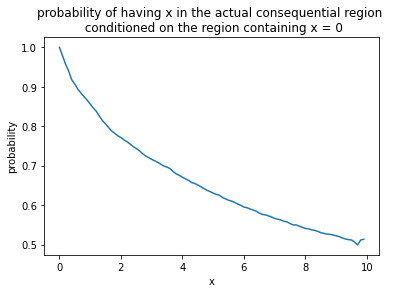

In [7]:
#YOUR CODE HERE
points = [x * 0.1 for x in range(0, 100)]
probabilities = []
for point in points:
    probabilities.append(conditional_probability(CR_list, point))


figure, axis = plt.subplots()
axis.plot(points, probabilities)
axis.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0")
axis.set_xlabel("x")
axis.set_ylabel("probability")

figure.savefig('PS5_Q3.png')

## Q4 Check Exponential Decrease [2 pts, HELP]

One way to check if the curve in Q3 has an exponential decrease is to plot a logarithmic $y$-axis and look for a straight line. Why can we check whether the curve is exponential by doing this? Please provide your answer in Gradescope.

## Q5.1 Logarithmic y-axis [5 pts, SOLO]
In two side-by-side subplots, plot Q3 with a logarithmic $y$-axis for $x$ ranging from -5 to 5 (subplot 1 on the left) and for $x$ ranging from -9.9 to 9.9 (subplot 2 on the right), both in 0.1 increments. Upload a figure `PS5_Q5.png` that includes these two subplots in Gradescope and make sure to title each subplot.

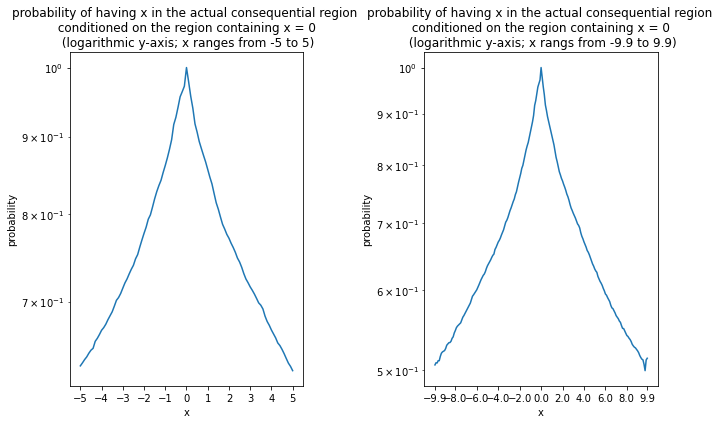

In [12]:
#YOUR CODE HERE
figure, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 6))

points1 = [x * 0.1 for x in range(-50, 51)]
probabilities1 = []
for point in points1:
    probabilities1.append(conditional_probability(CR_list, point))

axis1.semilogy(points1, probabilities1)
axis1.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0 \n (logarithmic y-axis; x ranges from -5 to 5)")
axis1.set_xlabel("x")
axis1.set_ylabel("probability")
axis1. set_xticks([i for i in range(-5, 6)])

points2 = [x * 0.1 for x in range(-99, 100)]
probabilities2 = []
for point in points2:
    probabilities2.append(conditional_probability(CR_list, point))

axis2.semilogy(points2, probabilities2)
axis2.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0 \n (logarithmic y-axis; x rangs from -9.9 to 9.9)")
axis2.set_xlabel("x")
axis2.set_ylabel("probability")
axis2.set_xticks([-9.9, -8, -6, -4, -2, 0, 2, 4, 6, 8, 9.9])

plt.tight_layout()

figure.savefig('PS5_Q5.png')

## Q5.2 Logarithmic y-axis [3 pts, SOLO]
What do these two plots show? How do you interpret them? Explain in a few sentences in Gradescope.

## Q6 Limited Number of Regions [5 pts, SOLO]

In previous questions, we've been assuming that people implement Shepard’s Universal Law of Generalization perfectly and we have been trying to approximate their behavior using 10,000 possible consequential regions. However, people have limited resources: What if they only used a few consequential regions in order to compute generalizations? 

1. Re-plot Q3 using only 10, 100, and 1000 consequential regions in the same plot (**NOT** 3 subplots) and make sure to have a legend. As in Q3, $x$ ranges from 0 to 10 in 0.1 increments. Save your plot as `PS5_Q6.png` and upload it to Gradescope.
2. What patterns do you see? Provide your explanation in Gradescope.

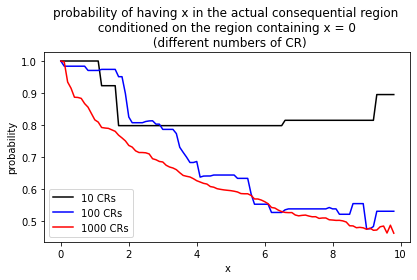

In [19]:
#YOUR CODE HERE
figure, axis = plt.subplots()

points = [x * 0.1 for x in range(0, 99)]

probabilities10 = []
for point in points:
    probabilities10.append(conditional_probability(CR_list[:10], point))

probabilities100 = []
for point in points:
    probabilities100.append(conditional_probability(CR_list[:100], point))

probabilities1000 = []
for point in points:
    probabilities1000.append(conditional_probability(CR_list[:1000], point))

    
axis.plot(points, probabilities10, 'k', label = r'10 CRs')
axis.plot(points, probabilities100, 'b', label = r'100 CRs')
axis.plot(points, probabilities1000, 'r', label = r'1000 CRs')
axis.set_xlabel("x")
axis.set_ylabel("probability")
axis.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0 \n (different numbers of CR)")
plt.legend()
plt.tight_layout()

figure.savefig('PS5_Q6.png')

## Q7 Normal Distribution [5 pts, SOLO]

In previous questions, we've been assuming that the consequential regions' start and end points were drawn uniformly (i.e., from a Uniform distribution). What if they were drawn from a Normal distribution instead? Re-plot Q5.1 with a new set of 10,000 possible consequential regions where the start and the end points are drawn from a Normal distribution with mean = 0 and standard deviation = 3. 

1. Save your plot as `PS5_Q7.png` and upload it to Gradescope.
2. How robust do you feel the generalization law is? Write down your answer in Gradescope.

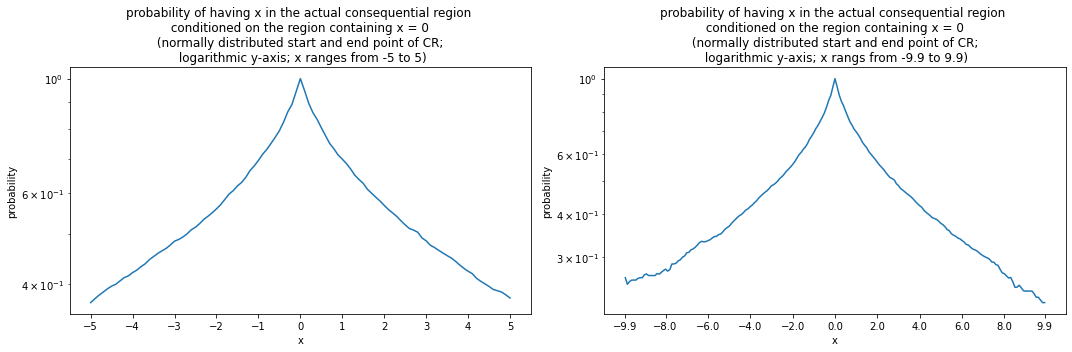

In [22]:
n = 10000
normal_CR_list = []

#YOUR CODE HERE

for _ in range(n):
    first = np.random.normal(0, 3)
    second = np.random.normal(0, 3)
    if first > second:
        normal_CR_list.append((second, first))
    else:
        normal_CR_list.append((first, second))


figure, (axis1, axis2) = plt.subplots(1, 2, figsize = (15, 5))

points1 = [x * 0.1 for x in range(-50, 51)]
probabilities1 = []
for point in points1:
    probabilities1.append(conditional_probability(normal_CR_list, point))

axis1.semilogy(points1, probabilities1)
axis1.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0 \n (normally distributed start and end point of CR; \n logarithmic y-axis; x ranges from -5 to 5)")
axis1.set_xlabel("x")
axis1.set_ylabel("probability")
axis1. set_xticks([i for i in range(-5, 6)])

points2 = [x * 0.1 for x in range(-99, 100)]
probabilities2 = []
for point in points2:
    probabilities2.append(conditional_probability(normal_CR_list, point))

axis2.semilogy(points2, probabilities2)
axis2.set_title("probability of having x in the actual consequential region \n conditioned on the region containing x = 0 \n (normally distributed start and end point of CR; \n logarithmic y-axis; x rangs from -9.9 to 9.9)")
axis2.set_xlabel("x")
axis2.set_ylabel("probability")
axis2.set_xticks([-9.9, -8, -6, -4, -2, 0, 2, 4, 6, 8, 9.9])

plt.tight_layout()


figure.savefig('PS5_Q7.png')

## Q8 Why Universal? [5 pts, HELP]

Answer the following questions in Gradescope, a couple of sentences for each:
1. Why did Shepard consider this law as "universal"?
2. Do you think this "universal" qualification is valid? Explain why or why not.

<div style="background-color: #c1f2a5">

# Submission

When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS5.

- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="https://www.dropbox.com/s/7s189m4dsvu5j65/instruction.png?dl=1" width="300"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS5-code.
    
</div>        




</div>

</div>
